### **Import Libraries and Data**

In [1]:
!pip install pandas
!brew install libomp

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.cbook import boxplot_stats

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import FuncFormatter

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 19.1.4, run:
  brew reinstall libomp


### **Data Overview**

In [2]:
# Loading the dataset
original_df = pd.read_csv('real_estate_dataset.csv', delimiter='|')

In [3]:
# Copying data to another variable to avoid any changes to original data
df=original_df.copy()

In [4]:
# Looking at the first 5 records
df.head()

,MLS,Address,Location,Style/Type,Year Built,Bedrooms,Bathrooms,Basement,Garages,Date of Sale,...,Zoning,Lot Dimensions,Land Area,Ownership Type,Style,Type,Frontage,Month of Sale,Year of Sale,Livable Floor Area
0,1369631,"575 TAKAMOSE PVT, Ottawa K1K 4Z4",Cfb & Area,Stacked / 3 Storey,2021,2,1.5,No Basement,0,Jan/29/2024,...,Residential Fourth Density Zone,0 ft x 0 ft,0.00,Condo,Stacked,3 Storey,0.00,January,2024,1227.0
1,1345774,"551 TAKAMOSE PVT, Ottawa K1K 5A5",Cfb & Area,Stacked / 3 Storey,2021,2,1.5,No Basement,0,Aug/02/2023,...,Residential Fourth Density Zone,0 ft x 0 ft,0.00,Condo,Stacked,3 Storey,0.00,August,2023,1227.0
2,1369697,"20 CHARLEVOIX ST #4, Ottawa K1L 8K5",Vanier,Stacked / 2 Storey,1984,2,1.5,No Basement,1,Dec/01/2023,...,Residential Fifth Density Zone,0 ft x 0 ft,0.00,Condo,Stacked,2 Storey,0.00,December,2023,1236.0
3,1383050,"21 MILNER DOWNS CRES, Ottawa K2M 2S3",Emerald Meadows/ Trailwest,Row Unit / 2 Storey,1998,3,2.5,Fully Finished,1,Apr/22/2024,...,Residential Third Density Zone,19.96 ft x 110.8 ft,2206.60,Freehold,Row Unit,2 Storey,19.96,April,2024,1229.0
4,1376403,"92 MILNER DOWNS CRES, Kanata K2M 2S4",Emerald Meadows/ Trailwest,Row Unit / 2 Storey,2001,3,2.5,Fully Finished,1,Feb/16/2024,...,Residential Third Density Zone,20.01 ft x 121.19 ft,2357.29,Freehold,Row Unit,2 Storey,20.01,February,2024,1647.0


**Observations:**

- As the variables **MLS** and **Address** are only ID variables, we assume that they don't have any predictive power to predict the dependent variable - **Sold Price**.
- We will remove these two variables from both the datasets.

In [5]:
df = df.drop(['MLS', 'Address'], axis = 1)

In [6]:
# Get shape of the dataset in terms of number of rows and number of colums
df.shape

(1436, 19)

# **Observations**
- There are 1436 rows and 19 columns in the data set

Now, let's find out some more information about the dataset, i.e., the total number of observations in the dataset, columns and their data types, etc.

In [7]:
# Check the data types as part of the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            1436 non-null   object 
 1   Style/Type          1436 non-null   object 
 2   Year Built          1436 non-null   int64  
 3   Bedrooms            1436 non-null   int64  
 4   Bathrooms           1436 non-null   float64
 5   Basement            1436 non-null   object 
 6   Garages             1436 non-null   int64  
 7   Date of Sale        1436 non-null   object 
 8   Sold Price          1436 non-null   float64
 9   Zoning              1436 non-null   object 
 10  Lot Dimensions      1436 non-null   object 
 11  Land Area           1436 non-null   float64
 12  Ownership Type      1436 non-null   object 
 13  Style               1436 non-null   object 
 14  Type                1436 non-null   object 
 15  Frontage            1436 non-null   float64
 16  Month 

**Observations:**

- The dataset has **1436 observations and 19 columns**. 
- There are no missing values
- We observe that the columns **Location**, **Style/Type**, **Basement**, **Date of Sale**, **Zoning**, **Lot Dimensions**, **Ownership Type**, **Style**, **Type**, and **Month of Sale** have data type **object**, which means they are strings or categorical variables.
- The remaining variables are all numerical in nature.

In [8]:
# Check each field how many items are null
df.isnull().sum()

Location              0
Style/Type            0
Year Built            0
Bedrooms              0
Bathrooms             0
Basement              0
Garages               0
Date of Sale          0
Sold Price            0
Zoning                0
Lot Dimensions        0
Land Area             0
Ownership Type        0
Style                 0
Type                  0
Frontage              0
Month of Sale         0
Year of Sale          0
Livable Floor Area    0
dtype: int64

**Observations**
- There are no columns that have null values.

In [9]:
# Get the percentage of null values in each columns and dort them in descending order
def percentage_null_values():
    result_list = []
    total_items =df.shape[0]
    null_values = df.isnull().sum()
    for index, column in enumerate(df.columns):
        percentage = round((null_values[index]/total_items)*100, 2)
        item = {
            "column": column,
            "percentage": percentage
        }
        result_list.append(item)
    return sorted(result_list, key=lambda d: d['percentage'], reverse=True)

# Display the list
def display_percentage_null_values():
    # Call the function to get the percentage of null values in each columns and dort them in descending order
    list_of_null = percentage_null_values()
    for item in list_of_null:
        separator = "\t\t"
        if len(item["column"]) < 7:
            separator = separator + "\t"
        print(item["column"], separator, str(item["percentage"]) + "%")

display_percentage_null_values()

Location 		 0.0%
Style/Type 		 0.0%
Year Built 		 0.0%
Bedrooms 		 0.0%
Bathrooms 		 0.0%
Basement 		 0.0%
Garages 		 0.0%
Date of Sale 		 0.0%
Sold Price 		 0.0%
Zoning 			 0.0%
Lot Dimensions 		 0.0%
Land Area 		 0.0%
Ownership Type 		 0.0%
Style 			 0.0%
Type 			 0.0%
Frontage 		 0.0%
Month of Sale 		 0.0%
Year of Sale 		 0.0%
Livable Floor Area 		 0.0%


**Observations**
- There are no columns that have null values.

### Summary Statistics

In [10]:
# Creating numerical columns
num_cols = df.select_dtypes('number').columns

# Checking the descriptive statistics of the numerical columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year Built,1436.0,1993.169916,29.816962,1800.0,1976.0000,2003.000,2.017000e+03,2024.00
Bedrooms,1436.0,3.162256,0.952237,0.0,3.0000,3.000,4.000000e+00,6.00
Bathrooms,1436.0,2.598189,0.970885,1.0,2.0000,2.500,3.500000e+00,6.00
Garages,1436.0,1.482591,1.035457,0.0,1.0000,1.000,2.000000e+00,8.00
Sold Price,1436.0,937714.082869,563406.010287,218000.0,615000.0000,779950.000,1.105500e+06,6300000.00
Land Area,1436.0,44349.235204,246043.079100,0.0,2333.0775,4499.310,8.694542e+03,4437407.01
Frontage,1436.0,76.808684,154.449700,0.0,24.1925,42.935,7.492000e+01,3400.00
Year of Sale,1436.0,2023.480501,0.541294,2022.0,2023.0000,2024.000,2.024000e+03,2024.00
Livable Floor Area,1436.0,1946.688294,892.106454,367.0,1308.0000,1746.000,2.434000e+03,8502.00


**Treating Outliers**

In [11]:
# For a given dataframe and column, get the whiskers
def get_whiskers_by_column(df, column):
    # Calculate quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    iqr = q3 - q1
    
    # Lower whisker
    lower_whisker = q1 - 1.5 * iqr
    
    # Upper whisker
    upper_whisker = q3 + 1.5 * iqr

    return lower_whisker, upper_whisker
    
# Calculate the lower whisker and upper whisker for each numerical column and replace 
# and smaller value than lower whisker with lower whisker, and any larger value than 
# upper whisker with upper whisker.
def treating_outliers(df, num_columns):
    # Iterate numerical columns
    for index, num_column in enumerate(num_columns):
        # Get whisker for each column
        lower_whisker, upper_whisker = get_whiskers_by_column(df, num_column)

        # Remove values smaller than lower_whisker with lower_whisker, and 
        # remove values larger than upper_whisker with upper_whisker
        df = df[~((df[num_column] < lower_whisker) | (df[num_column] > upper_whisker))]
        
        return df
   
# Restrict the outlier treatment to all numerical columns
num_columns = list(df.select_dtypes('number').columns)
#df = treating_outliers(df, num_columns)

In [12]:
# Creating numerical columns
num_cols = df.select_dtypes('number').columns

# Checking the descriptive statistics of the numerical columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year Built,1395.0,1996.040143,24.743878,1918.0,1979.500,2004.00,2017.000,2024.00
Bedrooms,1395.0,3.157706,0.951215,0.0,3.000,3.00,4.000,6.00
Bathrooms,1395.0,2.613262,0.961827,1.0,2.000,2.50,3.500,6.00
Garages,1395.0,1.507527,1.022232,0.0,1.000,1.00,2.000,8.00
Sold Price,1395.0,935217.005735,560852.898017,218000.0,615000.000,778000.00,1100000.000,6300000.00
Land Area,1395.0,42020.539693,238481.003386,0.0,2362.675,4520.84,8605.735,4437407.01
Frontage,1395.0,75.280523,147.023494,0.0,24.560,42.97,74.415,3400.00
Year of Sale,1395.0,2023.487455,0.537363,2022.0,2023.000,2024.00,2024.000,2024.00
Livable Floor Area,1395.0,1949.358703,897.106618,367.0,1307.500,1751.00,2442.500,8502.00


**Observations**
* Ended up not removing outliers as all models behaved worst with outliers beng removed.

In [13]:
# Check the data types as part of the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            1395 non-null   object 
 1   Style/Type          1395 non-null   object 
 2   Year Built          1395 non-null   int64  
 3   Bedrooms            1395 non-null   int64  
 4   Bathrooms           1395 non-null   float64
 5   Basement            1395 non-null   object 
 6   Garages             1395 non-null   int64  
 7   Date of Sale        1395 non-null   object 
 8   Sold Price          1395 non-null   float64
 9   Zoning              1395 non-null   object 
 10  Lot Dimensions      1395 non-null   object 
 11  Land Area           1395 non-null   float64
 12  Ownership Type      1395 non-null   object 
 13  Style               1395 non-null   object 
 14  Type                1395 non-null   object 
 15  Frontage            1395 non-null   float64
 16  Month of Sa

In [14]:
# Checking the count of unique values in each column
df.nunique()

Location               210
Style/Type              22
Year Built              99
Bedrooms                 7
Bathrooms               11
Basement                 5
Garages                  9
Date of Sale           505
Sold Price             750
Zoning                  37
Lot Dimensions        1100
Land Area              786
Ownership Type           2
Style                    5
Type                    11
Frontage               798
Month of Sale           12
Year of Sale             3
Livable Floor Area    1031
dtype: int64

**Observations**
* All categories are not unique.

In [15]:
# Check the proportion of Freehold versus Condo
df['Ownership Type'].value_counts(normalize = True)

Ownership Type
Freehold    0.86595
Condo       0.13405
Name: proportion, dtype: float64

**Observations**
- 86.98% of the properties are Freeholds, and 13.02% are Condos.

In [16]:
# Get all categorical columns
cat_columns = df.select_dtypes('object').columns

# Printing the % sub categories of each category.
for cat_column in cat_columns:
    print(df[cat_column].value_counts(normalize = True))
    print('*' * 40)

Location
Emerald Meadows/ Trailwest          0.043728
Kanata Lakes; Heritage Hills        0.033692
Stittsville (North)                 0.028674
Half Moon Bay                       0.027957
Riverside South; Gloucester Glen    0.026523
                                      ...   
Cedardale                           0.000717
West                                0.000717
Cumberland Village                  0.000717
Blossom Park/Leitrim                0.000717
N Dundas (Mountain) Twp             0.000717
Name: proportion, Length: 210, dtype: float64
****************************************
Style/Type
Detached / 2 Storey                   0.415054
Detached / Bungalow(1 Storey)         0.173477
Row Unit / 2 Storey                   0.166308
Apartment / One Level                 0.071685
Row Unit / 3 Storey                   0.034409
Stacked / 2 Storey                    0.023656
Detached / Split Level                0.021505
Semi Detached / 2 Storey              0.021505
Detached / 1 1/2 Store

#### **Univariate Analysis**

In [17]:
# Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Built,1395.0,1996.040143,24.743878,1918.0,1979.500,2004.00,2017.000,2024.00
Bedrooms,1395.0,3.157706,0.951215,0.0,3.000,3.00,4.000,6.00
Bathrooms,1395.0,2.613262,0.961827,1.0,2.000,2.50,3.500,6.00
Garages,1395.0,1.507527,1.022232,0.0,1.000,1.00,2.000,8.00
Sold Price,1395.0,935217.005735,560852.898017,218000.0,615000.000,778000.00,1100000.000,6300000.00
Land Area,1395.0,42020.539693,238481.003386,0.0,2362.675,4520.84,8605.735,4437407.01
Frontage,1395.0,75.280523,147.023494,0.0,24.560,42.97,74.415,3400.00
Year of Sale,1395.0,2023.487455,0.537363,2022.0,2023.000,2024.00,2024.000,2024.00
Livable Floor Area,1395.0,1949.358703,897.106618,367.0,1307.500,1751.00,2442.500,8502.00


**Observations**
* Sold Prices range from \\$218,000.00 to \\$6,300,000.00

In [18]:
# Calculate the median for each column
def show_median_for_all_numerical_columns(df):
    # Get the numerical columns
    num_columns = df.select_dtypes('number').columns

    print("COLUMN\t\t\tMEDIAN")
    print("*"*37)
    for num_column in num_columns:
        separator = "\t\t"
        if len(num_column) < 7:
            separator = separator + "\t"
        print(num_column, separator, df[num_column].median())

show_median_for_all_numerical_columns(df)

COLUMN			MEDIAN
*************************************
Year Built 		 2004.0
Bedrooms 		 3.0
Bathrooms 		 2.5
Garages 		 1.0
Sold Price 		 778000.0
Land Area 		 4520.84
Frontage 		 42.97
Year of Sale 		 2024.0
Livable Floor Area 		 1751.0


**Observations**
* The median sold price is $779,950
* The median Livable Floor Area is 1,746 SqFt.

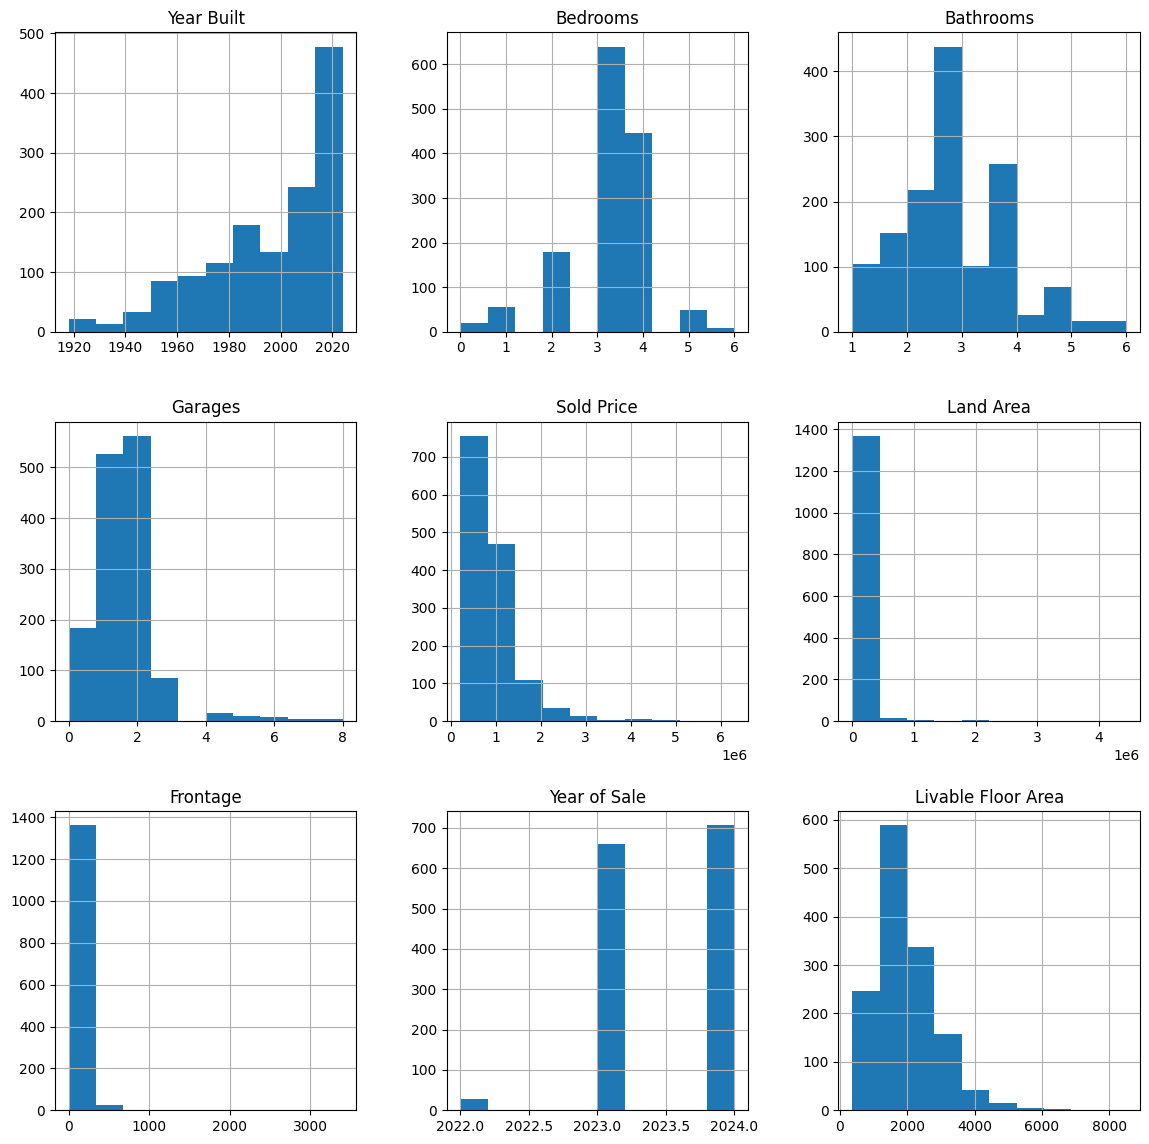

In [19]:
# Creating histograms
df.hist(figsize = (14, 14))

plt.show()

In [20]:
def show_median_sold_price(df, group_by_column):
    print("\nMedian Sold Prices by Location (Descending Order)\n")
    
    # Get unique values in the group_by_column
    style_types = df[group_by_column].unique()
    
    # List to store the results as tuples of (style_type, median_price)
    median_prices = []
    
    for style_type in style_types:
        # Filter the DataFrame for the current style_type
        filtered_df = df[df[group_by_column] == style_type]
        
        # Calculate the median for the 'Sold Price' column for the current group
        median_price = filtered_df['Sold Price'].median()
        
        # Append the result to the list
        median_prices.append((style_type, median_price))
    
    # Sort the list of tuples by the second element (median price) in descending order
    median_prices.sort(key=lambda x: x[1], reverse=True)
    
    # Print the sorted results
    for style_type, median_price in median_prices:
        print(f"{style_type}\t\t {median_price}")

# Display in descending order SAle Price by Style/Type
show_median_sold_price(df, group_by_column='Style/Type')


Median Sold Prices by Location (Descending Order)

Semi Detached / 3 Storey		 1682500.0
Detached / 3 Storey		 1274500.0
Detached / Double		 1125000.0
Detached / Bungalow with Loft		 1075000.0
Detached / 2 Storey		 1040000.0
Row Unit / Bungalow(1 Storey)		 930000.0
Detached / Bungalow(1 Storey)		 790000.0
Semi Detached / 2 Storey		 755750.0
Detached / 1 1/2 Storey		 738000.0
Detached / Hi Ranch		 725000.0
Detached / Duplex		 712000.0
Detached / Split Level		 677819.0
Row Unit / 2 Storey		 620717.5
Semi Detached / Bungalow(1 Storey)		 552250.0
Row Unit / 3 Storey		 542250.0
Stacked / Bungalow(1 Storey)		 515000.0
Stacked / 3 Storey		 495000.0
Stacked / 2 Storey		 425000.0
Apartment / One Level		 419500.0
Stacked / One Level		 414500.0
Detached / Mobile		 359900.0
Apartment / Other		 300000.0


**Observations**
* Median Detached / 2 Storey Sold Price is \\$1,030,000
* Median Row Unit / 2 Storey Sold Price is \\$620,000
* Median sale prices based on the style/type:
| Style/Type | Sold Price |
| :- | -: |
| Semi Detached / 3 Storey | \\$1,683,000
| Detached / 3 Storey |	\\$1,360,000
| Detached / Bungalow with Loft |	\\$1,075,000
| **Detached / 2 Storey**	|**\\$1,030,000**
| Detached / Double |	\\$1,125,000
| Row Unit / Bungalow(1 Storey)|	\\$930,000
| Detached / Bungalow(1 Storey)|	\\$790,000
| Detached / Duplex	| \\$712,000
| Semi Detached / 2 Storey	|\\$756,000
| Detached / 1 1/2 Storey|	\\$738,000
| Detached / Hi Ranch|	\\$725,000
| Detached / Split Level |	\\$678,000
| **Row Unit / 2 Storey**|	**\\$620,000**
| Row Unit / 3 Storey|	\\$542,000
| Stacked / Bungalow(1 Storey)| \\$515,000
| Semi Detached / Bungalow(1 Storey)|	\\$532,000
| Stacked / 3 Storey|	\\$495,000
| Apartment / One Level|	\\$420,000
| Stacked / 2 Storey|	\\$425,000
| Stacked / One Level|	\\$415,000
| Detached / Mobile|	\\$360,000
| Apartment / Other|	\\$300,000

In [21]:
# Display in descending order Sale Price by Location
show_median_sold_price(df, group_by_column='Location')


Median Sold Prices by Location (Descending Order)

Crystal Bay/Rocky Point		 4000000.0
Rothwell Heights		 2800000.0
Rockcliffe Park		 2587500.0
Manotick East To Manotick Station		 2535000.0
Cedarhill/Orchard Estates		 2332500.0
Kanata (North East)		 2230000.0
Faircrest Heights		 2095000.0
Cumberland Village		 2075000.0
Rural Kanata (Central)		 2067500.0
Applewood Acres		 1975000.0
Manor Park		 1850000.0
West		 1800000.0
Ashdale/Rideau Glen		 1700000.0
Alta Vista		 1689500.0
Manotick Village & Manotick Estates		 1657500.0
Playfair Park		 1608000.0
Ottawa East		 1565000.0
Cedardale		 1548900.0
Blossom Park/Leitrim		 1518000.0
Btw Hy 16 & Rideau Rv Rideau Hts		 1515000.0
Old Ottawa South/Rideau Gardens		 1504950.0
Mckellar/Highland		 1500000.0
Ottawa Centre/Golden Triangle		 1467500.0
Kanata (North West)		 1465000.0
Dows Lake		 1453000.0
Rideau Twp S Of Reg Rd 6 W Of Mccordick Rd.		 1450000.0
Vankleek Hill		 1390000.0
Bruce Frm/Graham Pk/Qualicum/Bellands		 1375000.0
Mooneys Bay		 135500

**Show the relationship between the Sold Price and Livable Floor Area**

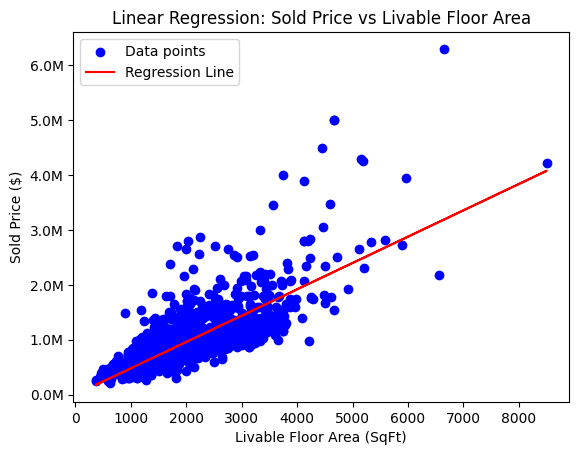

In [22]:
def relationship_between_sold_price_and_vivable_floor_area(df):
    # Replace with actual column names from your DataFrame
    X = df['Livable Floor Area'].values.reshape(-1, 1)  # Independent variable (Livable Floor Area)
    y = df['Sold Price'].values  # Dependent variable (Sold Price)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(X, y)
    
    # Predict the values based on the linear regression model
    y_pred = model.predict(X)
    
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Data points')
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')
    
    # Add labels and title
    plt.xlabel('Livable Floor Area (SqFt)')
    plt.ylabel('Sold Price ($)')
    plt.title('Linear Regression: Sold Price vs Livable Floor Area')
    
    # Format y-axis to show values in millions
    formatter = FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M')  # Divide by 1 million and format with one decimal
    plt.gca().yaxis.set_major_formatter(formatter)
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

relationship_between_sold_price_and_vivable_floor_area(df)

**Properties up to 2M are more dependable on Livable Floor Area**

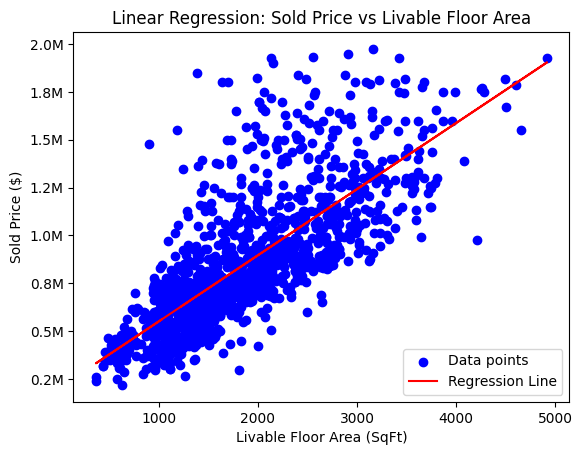

In [23]:
filtered_df = df[df['Sold Price'] < 2000000]
relationship_between_sold_price_and_vivable_floor_area(filtered_df)

**Observations**
* Livable Floor Area matters more for properties up to 2M

#### **Multivariate Analysis**

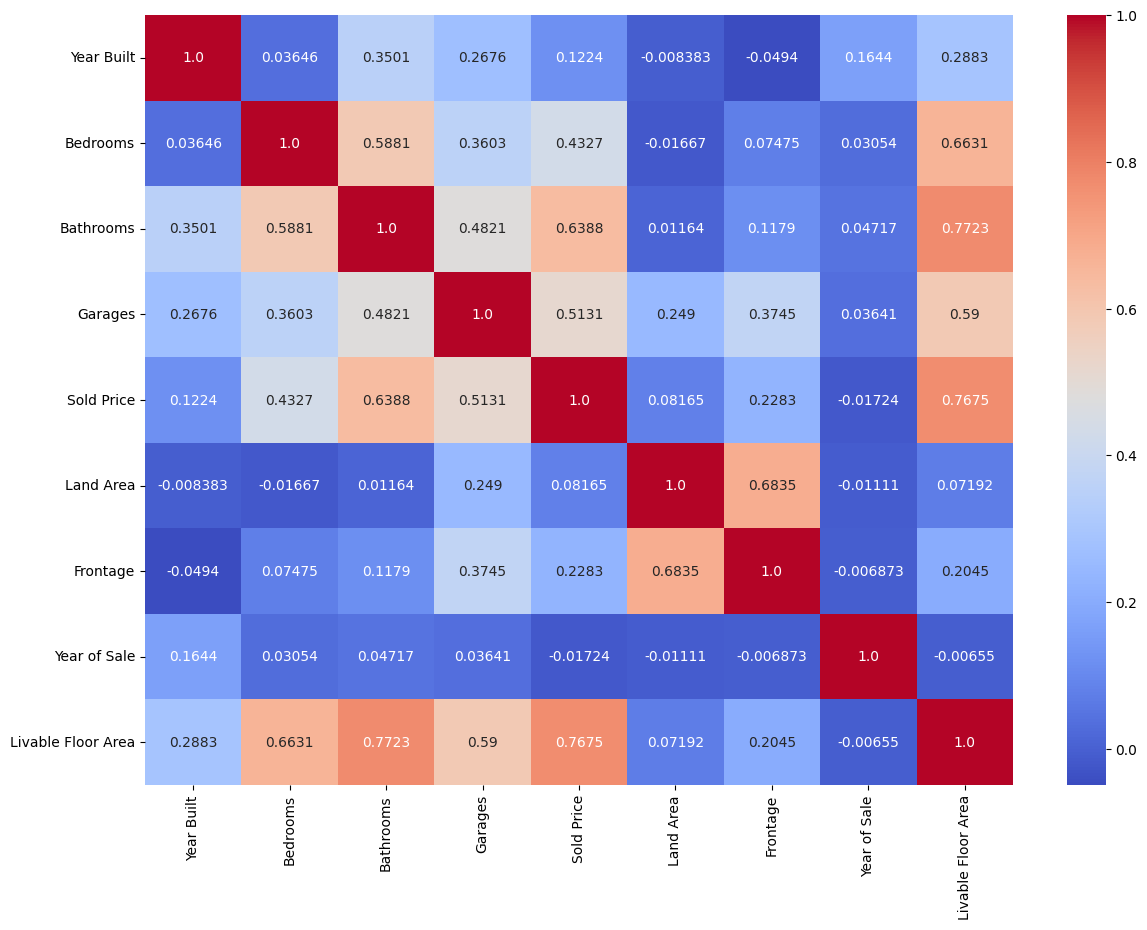

In [24]:
def show_correlations_as_heatmap(df):
    # Get the numerical columns
    num_columns = df.select_dtypes('number').columns
    
    # Check for correlation among numerical variables
    corr = df[num_columns].corr()
    
    # Plot the heatmap
    plt.figure(figsize = (14, 10))
    sns.heatmap(corr, annot = True, cmap = 'coolwarm',
              fmt = ".4", xticklabels = corr.columns,
              yticklabels = corr.columns)

show_correlations_as_heatmap(df)

**Observations:**

* Sold Price correlation is as following:
    * Highly correlated with Livable Floor Area and Bathrooms.
    * Medium correlated with Garages and Bedrooms.
    * Low correlation with Frontage.
    * No correlation with Year of Sale, Land Area, and Year Built.
* Remove Year of Sale, Land Area, and Year Built and there are not correlated with Sale Price.

In [25]:
df = df.drop(['Year of Sale', 'Land Area'], axis = 1)

## **Data Preparation**

**Creating dummy variables for the categorical variables**

In [26]:
print(df.columns)

Index(['Location', 'Style/Type', 'Year Built', 'Bedrooms', 'Bathrooms',
       'Basement', 'Garages', 'Date of Sale', 'Sold Price', 'Zoning',
       'Lot Dimensions', 'Ownership Type', 'Style', 'Type', 'Frontage',
       'Month of Sale', 'Livable Floor Area'],
      dtype='object')


In [27]:
def creating_dummy_variables(df, columns_to_drop, columns_to_create_dummy):
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    
    # Creating a list of columns for which we will create dummy variables
    to_get_dummies_for = columns_to_create_dummy
    
    # Creating dummy variables
    df = pd.get_dummies(data = df, columns = to_get_dummies_for)
    return df

# df = creating_dummy_variables(df, 
#                 columns_to_drop=['Lot Dimensions', 'Date of Sale', 'Month of Sale', 'Style/Type', 'Type', 'Zoning', 
#                                  'Basement', 'Ownership Type', 'Style'],
#                 columns_to_create_dummy=['Location'])

df = creating_dummy_variables(df, 
                columns_to_drop=['Lot Dimensions', 'Date of Sale', 'Month of Sale', 'Style/Type', 'Type'],
                columns_to_create_dummy=['Location', 'Zoning', 'Basement', 'Ownership Type', 'Style'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1435
Columns: 266 entries, Year Built to Style_Stacked
dtypes: bool(259), float64(4), int64(3)
memory usage: 440.0 KB


## **Model Building**

**Separating the independent variables (X) and the dependent variable (Y)**

In [29]:
# Separating the target variable and other variables

Y = df['Sold Price']

X = df.drop(['Sold Price'], axis = 1)

**Splitting the data into 80% train and 20% test set**

### **Linear Regression**

In [30]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [31]:
# Build the regression model
lr_model = LinearRegression()  
lr_model.fit(x_train, y_train)


LinearRegression()

In [32]:
lr_predictions = lr_model.predict(x_test)

In [33]:
print("Coefficient:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Coefficient: [ 4.60611273e+03 -6.25263499e+04  6.85448627e+04  8.53672383e+04
  2.97282635e+02  3.09609732e+02 -2.29998897e+05 -7.43285519e+05
  6.21772862e+04  3.78310966e+05  1.24875653e+05 -1.38278846e+05
  6.50650637e+05 -3.64076332e+05 -2.58581959e+05 -2.27717836e+05
 -8.03620240e+04 -2.08824458e+05 -3.35462117e+05 -2.99483271e+05
 -3.12596230e+04  2.26293929e+02  5.07504055e+04 -1.61075904e+05
 -2.82773796e+05 -3.55357770e-08  9.45880360e+04 -1.54979164e+04
  6.35379684e+04  1.08061877e+05 -2.67760155e+05 -2.33052052e+05
  3.66882952e+04  3.44763400e+04 -1.41059643e+05  1.45687425e+05
  1.49188501e+05  2.08431453e+05  2.28201643e+05 -4.46541218e+05
 -1.89119546e+05 -3.15452573e+05  1.71946926e+05 -4.44866343e+05
  1.63401292e+04  2.18896528e+05  3.60115258e+05 -2.76978219e+05
 -2.39906443e+05 -1.58842347e+05  4.12313369e+04 -2.17862770e+05
 -5.42495400e-08  2.58956255e+05  7.74062099e+05  3.16904484e+05
  6.95397905e+04 -5.82315373e+04 -2.27452373e+05 -1.44028859e+05
 -2.51881301

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    r2 = r2_score(y_test, predictions)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    # Calculate RMSLE
    rmsle = np.sqrt(np.mean((np.log1p(predictions) - np.log1p(y_test)) ** 2))
    
    # Print the results with 4 decimal places
    print(f"Mean Squared Error: {mse:.0f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.0f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
    print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.4f}")
    print(f"R² Score: {r2:.4f}")

metrics(lr_predictions)

Mean Squared Error: 92179884390
Root Mean Squared Error (RMSE): 303611
Mean Absolute Percentage Error (MAPE): 19.43
Root Mean Squared Logarithmic Error (RMSLE): 0.3058
R² Score: 0.7666


Top 50 Important Features (for Linear Regression):
                                      Feature    Importance
71           Location_Crystal Bay/Rocky Point  2.283804e+06
185                 Location_Rothwell Heights  1.609784e+06
77                         Location_Dows Lake  1.128852e+06
183                  Location_Rockcliffe Park  1.014432e+06
121                   Location_Laurentianview  7.755765e+05
54                         Location_Cedardale  7.740621e+05
152  Location_Old Ottawa South/Rideau Gardens  7.633844e+05
151                 Location_Old Ottawa South  7.592805e+05
7           Location_Alfred & Plantagenet Twp  7.432855e+05
114              Location_Kanata (North East)  7.112745e+05
242     Zoning_Rural Residential Density Zone  6.935598e+05
96                             Location_Glebe  6.775382e+05
135  Location_Manotick South To Roger Stevens  6.764720e+05
189     Location_S Glengarry (Chrlttnbgh) Twp  6.519022e+05
12               Location_Ashdale/Rideau Glen  6.

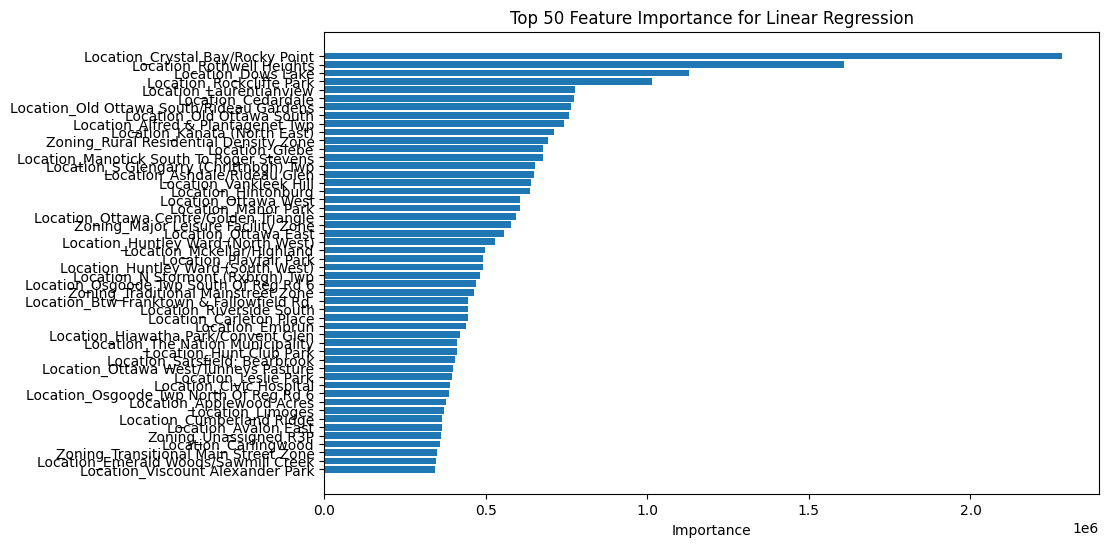

In [35]:
def feature_importance_lr(top):
    # Getting the feature importance (based on absolute values of coefficients)
    importance = np.abs(lr_model.coef_)
    
    # Creating a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })
    
    # Sorting the features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Display the top 'top' most important features
    top_features = feature_importance_df.head(top)
    
    # Display the top 'top' features
    print(f"Top {top} Important Features (for Linear Regression):")
    print(top_features)
    
    # Plotting the top 'top' feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top {top} Feature Importance for Linear Regression')
    plt.gca().invert_yaxis()  # To display the most important features at the top
    plt.show()

# Call the function for top 30 features
feature_importance_lr(50)

### **Decision Tree Regressor**

In [36]:
# Building decision tree model
dt_model = DecisionTreeRegressor(max_depth=5, criterion='squared_error')

# Fitting decision tree model
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [37]:
dt_predictions = dt_model.predict(x_test)

In [38]:
metrics(dt_predictions)

Mean Squared Error: 162703852210
Root Mean Squared Error (RMSE): 403366
Mean Absolute Percentage Error (MAPE): 21.45
Root Mean Squared Logarithmic Error (RMSLE): 0.2847
R² Score: 0.5881


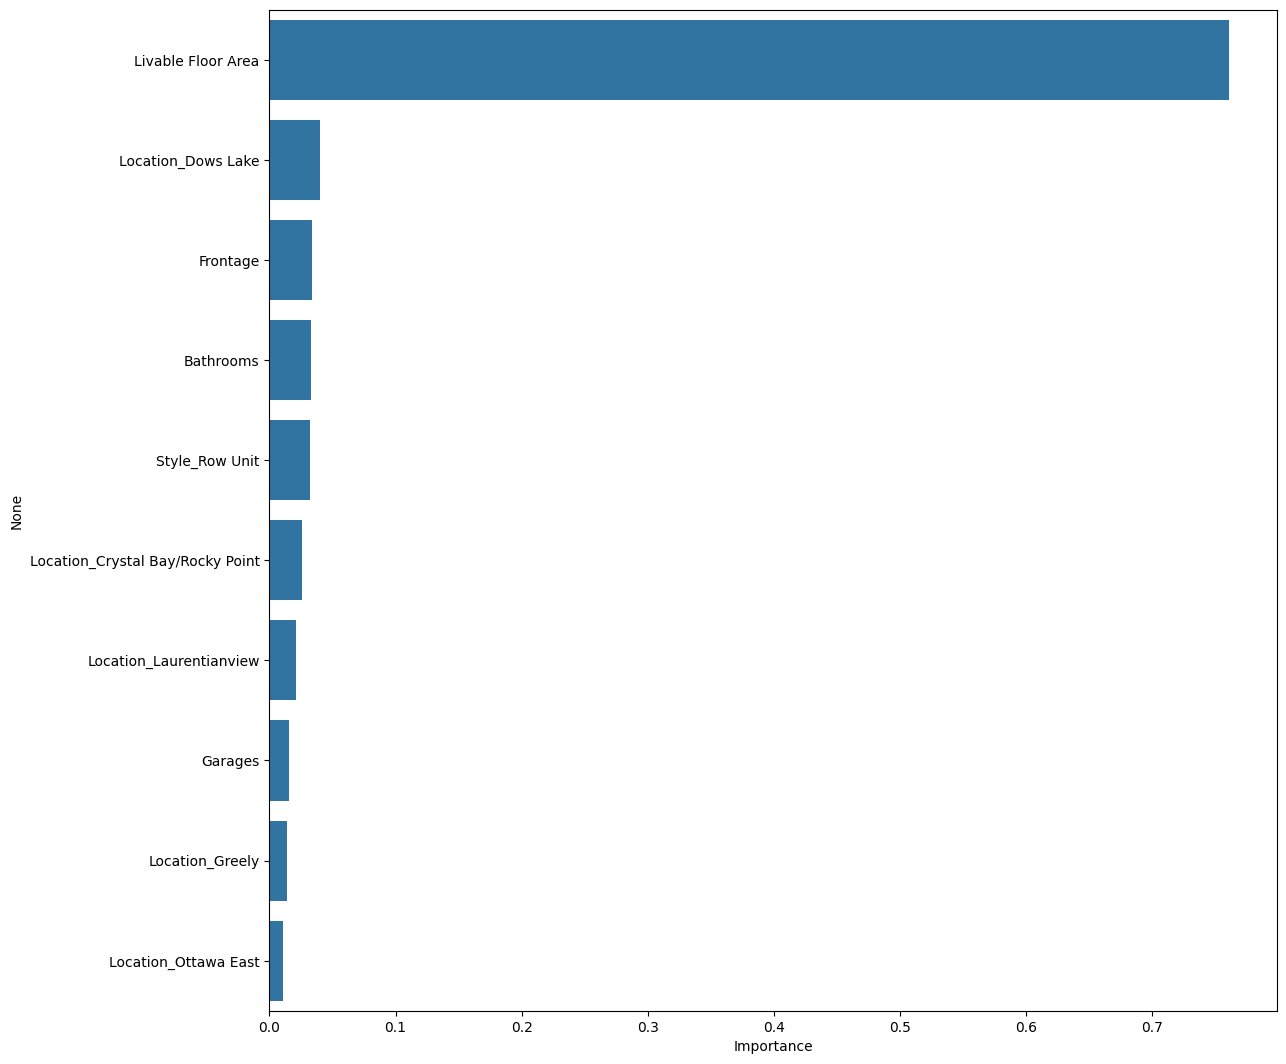

In [39]:
def plot_the_feature_importance(model, top_number_of_features):
    # Plot the feature importance
    importances = model.feature_importances_
    
    columns = X.columns
    
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

    # Select top most important features
    top_n_importance_df = importance_df.head(top_number_of_features)
    
    plt.figure(figsize = (13, 13))
    
    sns.barplot(x=top_n_importance_df.Importance,y=top_n_importance_df.index)

plot_the_feature_importance(dt_model, 10)

**Observations**
* Top 5 most important features:
    * Livable Floor Area
    * Frontage
    * Bathrooms
    * Garages
    * Location

Remove features that are not important: **Basement'** and **Ownership Type**.


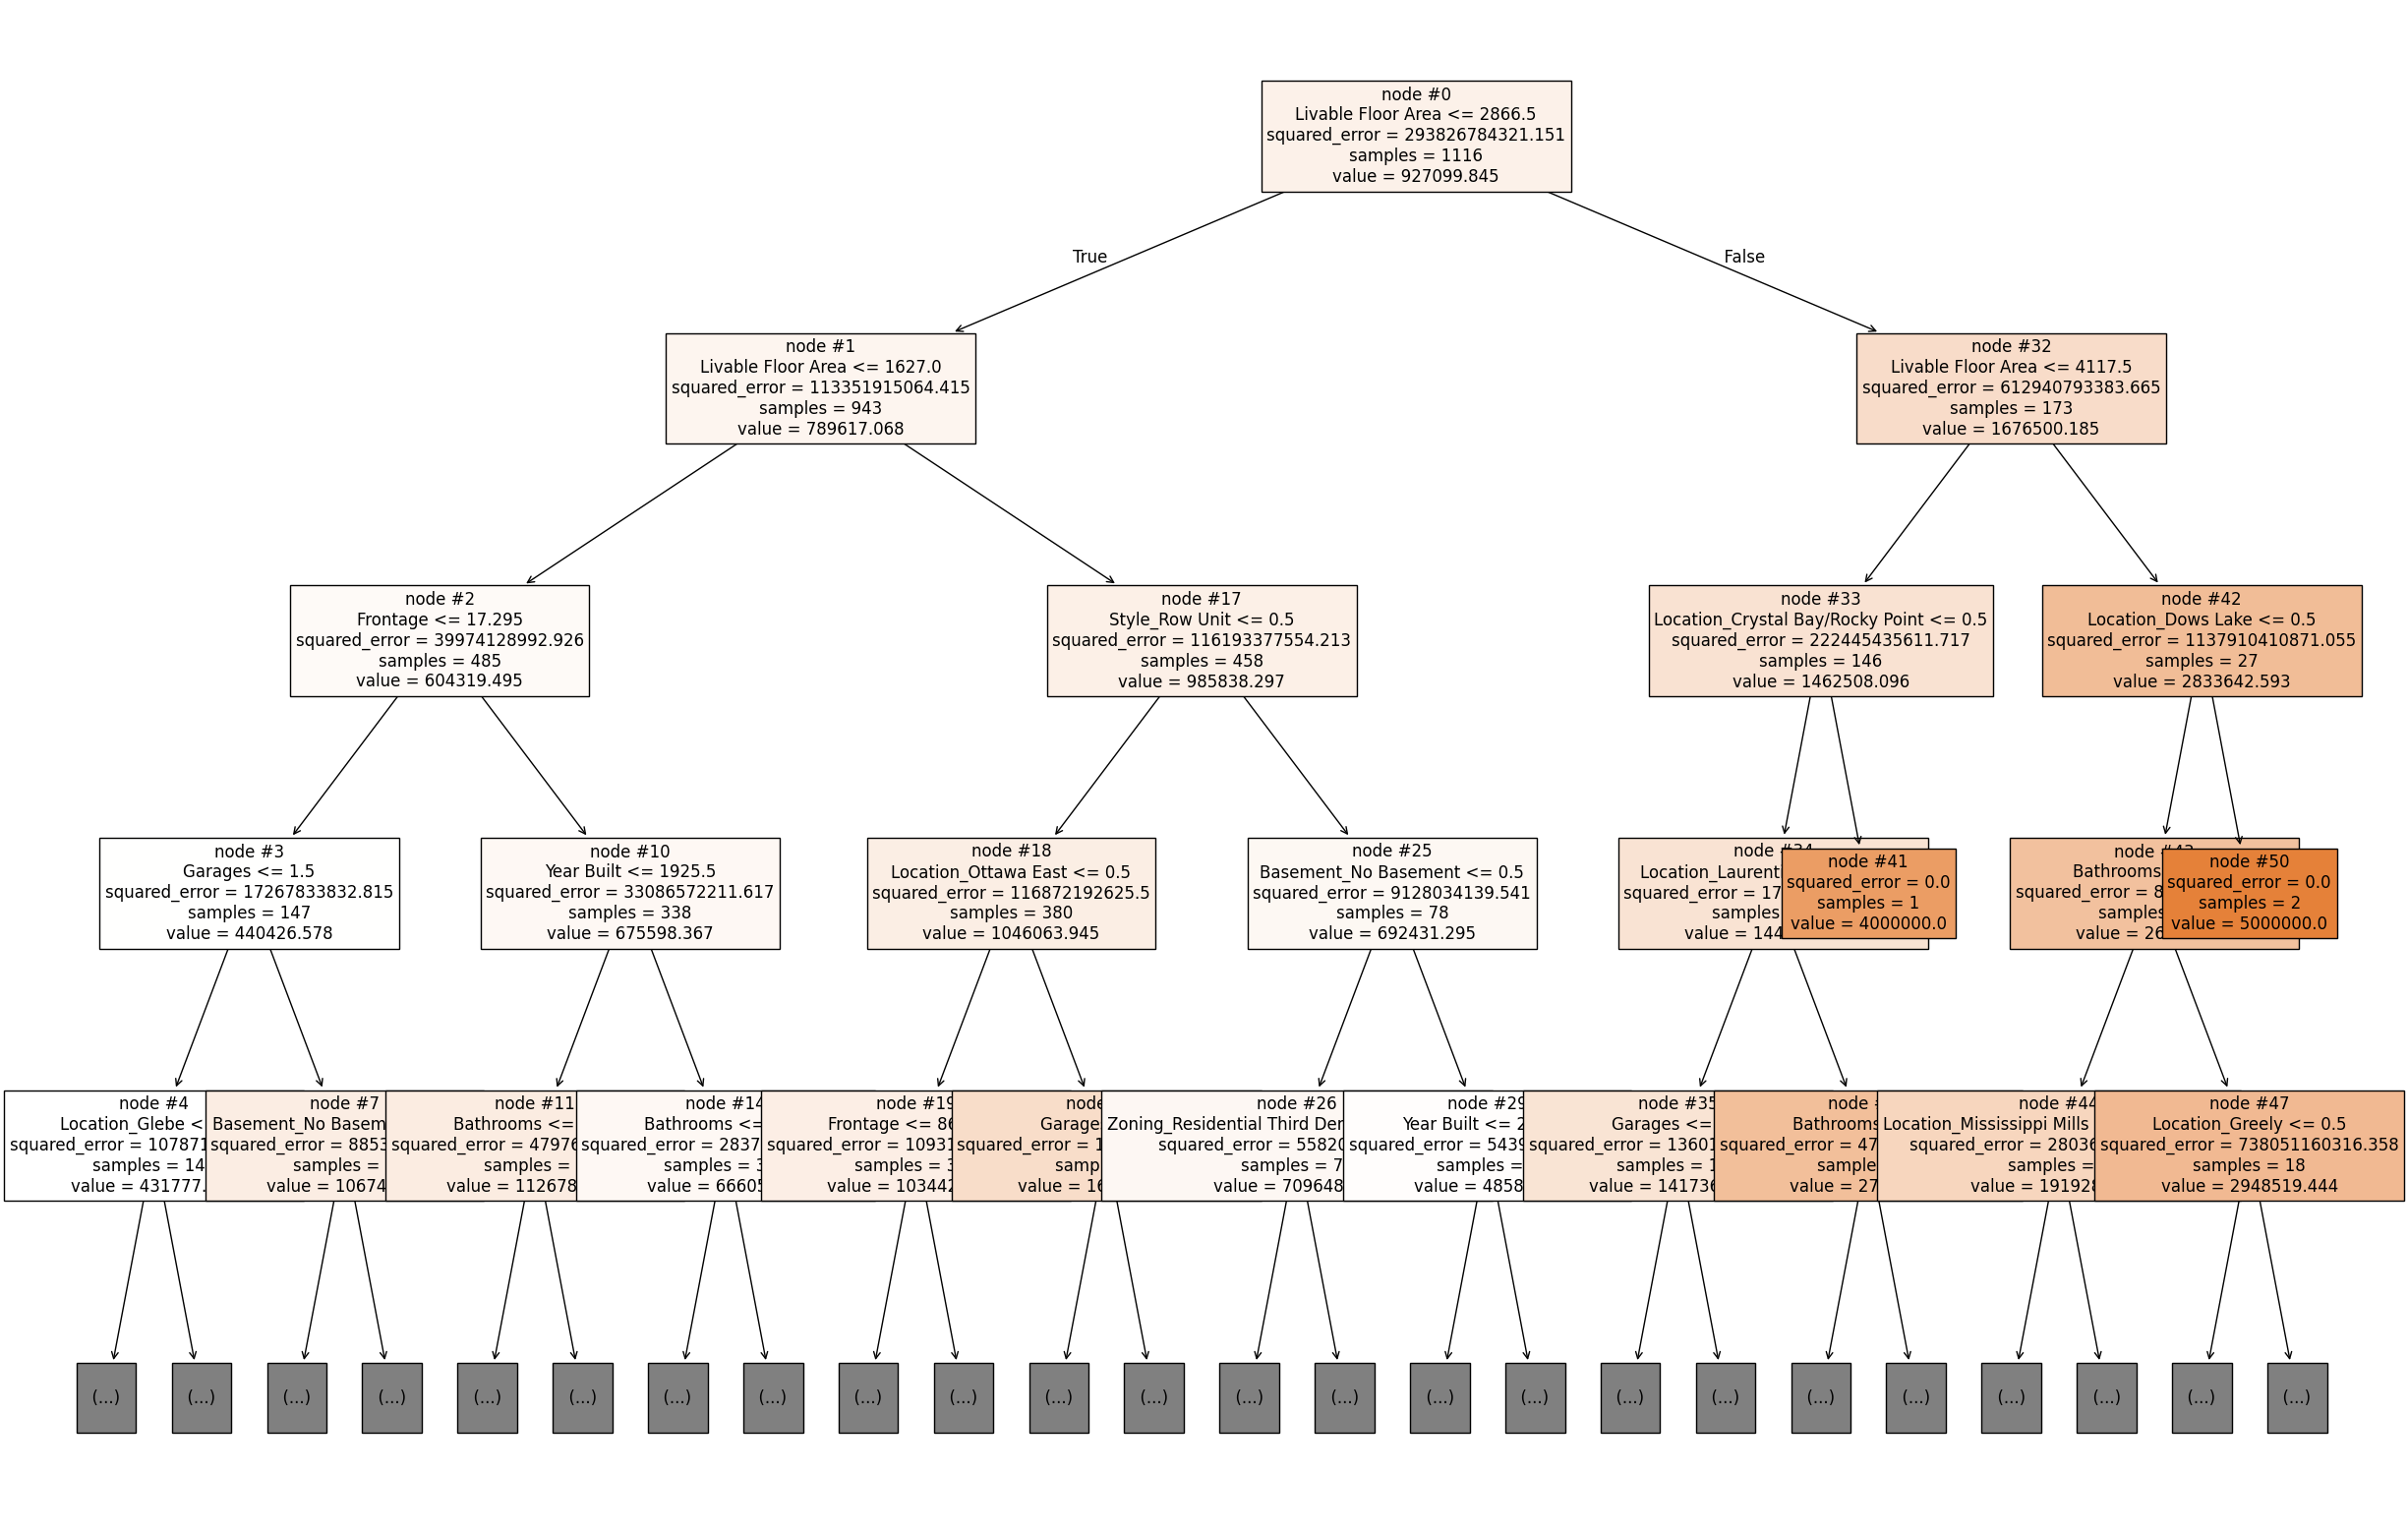

In [40]:
def plot_decision_tree(dt, X):
    # Plot the decision tree
    features = list(X.columns)
    
    plt.figure(figsize = (30, 20))
    tree.plot_tree(dt_model, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
    plt.show()

plot_decision_tree(dt_model, X)

### **Decision Tree Regressor - Hyperparameter Tuning**

In [41]:
# Choose the type
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse']
}

tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_


In [42]:
# Checking performance on the training dataset
y_train_pred_dt = best_model.predict(x_test)

In [43]:
metrics(y_train_pred_dt)

Mean Squared Error: 249512280382
Root Mean Squared Error (RMSE): 499512
Mean Absolute Percentage Error (MAPE): 24.37
Root Mean Squared Logarithmic Error (RMSLE): 0.3223
R² Score: 0.3684


### **Random Forest Regressor**

In [44]:
# Fitting the Random Forest regressor on the training data
rf_estimator = RandomForestRegressor(criterion='squared_error', n_estimators = 55, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestRegressor(n_estimators=55, random_state=1)

In [45]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_test)

In [46]:
metrics(y_pred_train_rf)

Mean Squared Error: 107645254253
Root Mean Squared Error (RMSE): 328093
Mean Absolute Percentage Error (MAPE): 13.83
Root Mean Squared Logarithmic Error (RMSLE): 0.1980
R² Score: 0.7275


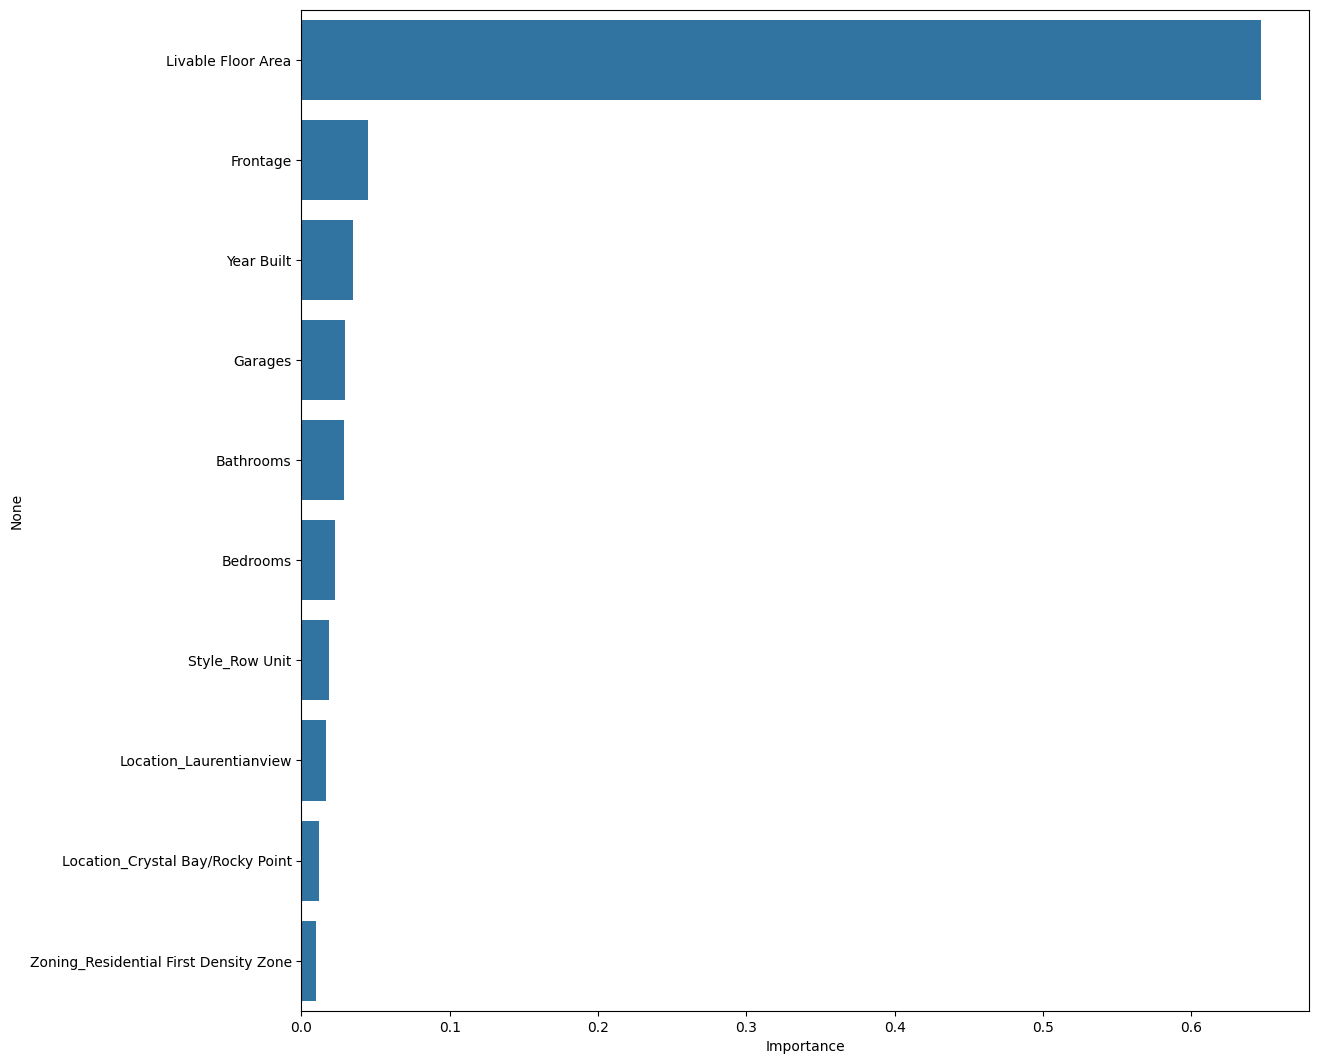

In [47]:
plot_the_feature_importance(rf_estimator, 10)

### **Random Forest Regressor - Hyperparameter Tuning**

In [48]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [49]:
# Checking performance on the training data
y_pred_train_rf = grid_search.predict(x_test)

In [50]:
metrics(y_pred_train_rf)

Mean Squared Error: 98545029826
Root Mean Squared Error (RMSE): 313919
Mean Absolute Percentage Error (MAPE): 13.10
Root Mean Squared Logarithmic Error (RMSLE): 0.1891
R² Score: 0.7505


### **XGBoost Reggressor**

In [51]:
# Create an XGBoost regressor
xgboost_model = XGBRegressor(booster='gbtree',
                            n_estimators=100,           # Number of boosting rounds (trees)
                            learning_rate=0.1,          # Step size for each tree
                            max_depth=6,                # Maximum depth of each tree
                            min_child_weight=1,         # Minimum sum of instance weight for a leaf
                            subsample=0.8,              # Fraction of samples used for each tree
                            colsample_bytree=0.8,       # Fraction of features used for each tree
                            gamma=0,                    # Minimum loss reduction for split
                            scale_pos_weight=1,         # For imbalanced datasets
                            tree_method='auto')         # Default tree method)

# Fit the model
xgboost_model.fit(x_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(x_test)

metrics(y_pred)

Mean Squared Error: 91363122323
Root Mean Squared Error (RMSE): 302263
Mean Absolute Percentage Error (MAPE): 13.36
Root Mean Squared Logarithmic Error (RMSLE): 0.1864
R² Score: 0.7687


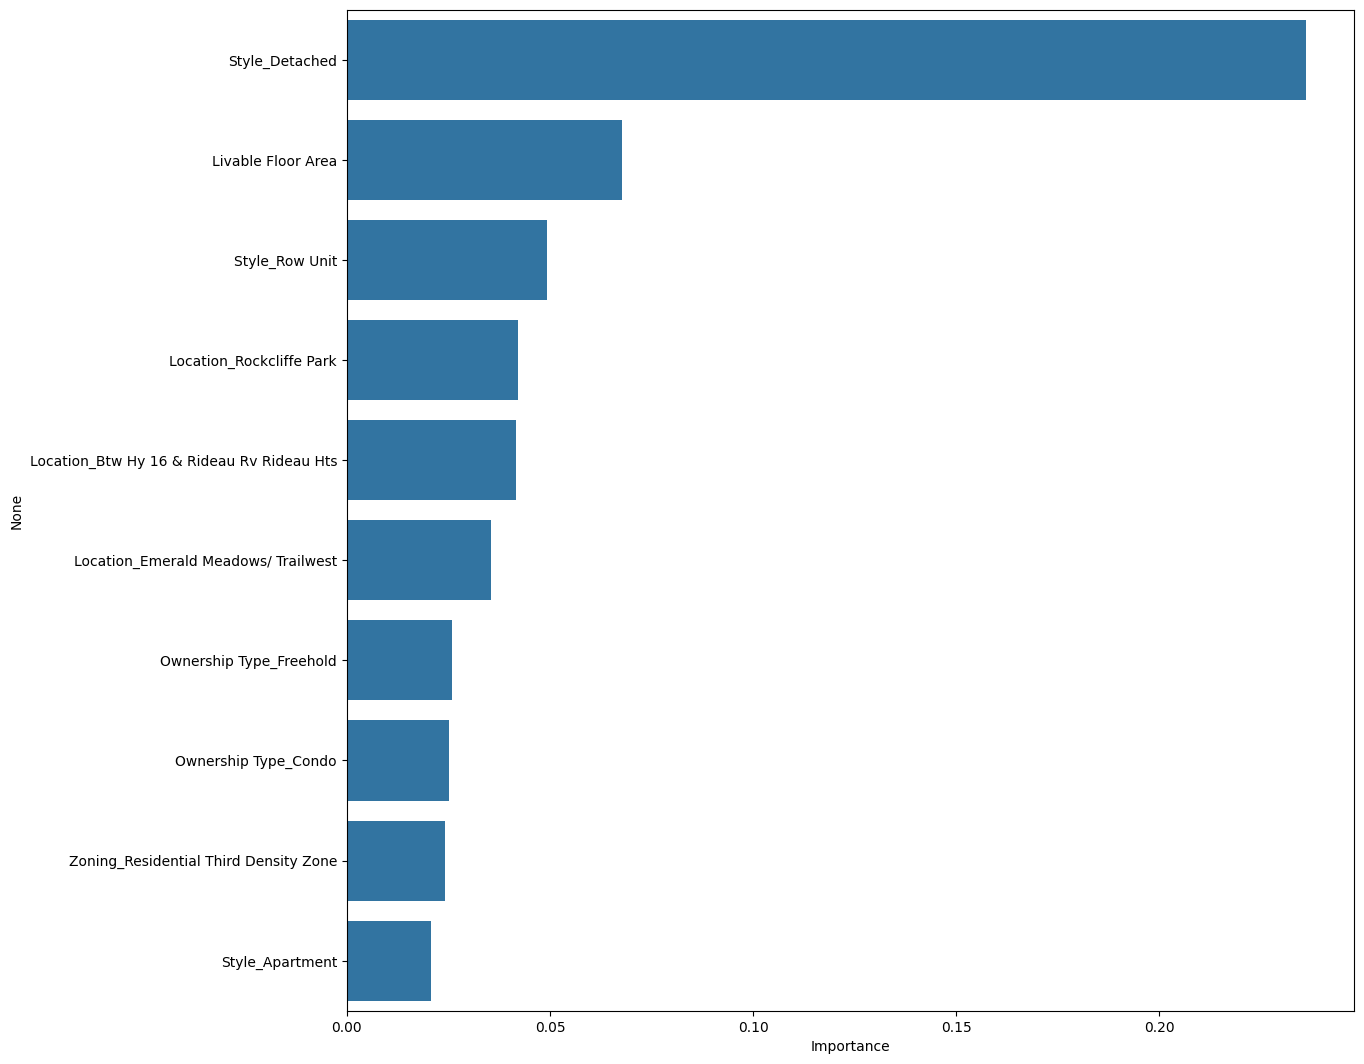

In [52]:
plot_the_feature_importance(xgboost_model, 10)

### 